# Chapter 01: Introduction to Generative AI Concepts

🚀 **Learn Generative AI — Code-First, Book-Free**

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **What is Generative AI** and how it differs from traditional machine learning
2. **Key terminology** and concepts in the GenAI landscape
3. **The evolution** from RNNs → Transformers → Large Language Models
4. **Mathematical foundations** behind attention mechanisms (simplified)
5. **Practical applications** and real-world use cases
6. **The path ahead** - from foundations to AI agents

---

## 📋 Prerequisites Checklist

- ✅ Python 3.8+ installed
- ✅ Virtual environment set up (`.venv`)
- ✅ Basic packages installed (`numpy`, `matplotlib`, `pandas`)
- ✅ Curiosity and willingness to experiment!

---

> **💡 Remember**: This is a **code-first** approach. We'll understand concepts by implementing and visualizing them!


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Print environment info
print("🎉 Environment Setup Complete!")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🐍 Python Libraries:")
print(f"   - NumPy: {np.__version__}")
print(f"   - Pandas: {pd.__version__}")
print(f"   - Matplotlib: Ready for visualizations!")
print(f"\n🚀 Ready to learn Generative AI!")

🎉 Environment Setup Complete!
📅 Date: 2025-07-02 22:21:16
🐍 Python Libraries:
   - NumPy: 2.3.1
   - Pandas: 2.3.0
   - Matplotlib: Ready for visualizations!

🚀 Ready to learn Generative AI!


## 🤖 Part 1: What is Generative AI?

### Traditional AI vs Generative AI

**Traditional AI (Discriminative Models):**

- Analyzes and classifies existing data
- Answers: "What is this?" or "Which category?"
- Examples: Image classification, spam detection, sentiment analysis

**Generative AI (Generative Models):**

- Creates new data that resembles training data
- Answers: "What would new data look like?"
- Examples: Text generation, image creation, code synthesis

### 🎯 Key Insight

> **Generative AI doesn't just understand data — it creates new data!**

Let's visualize this difference:


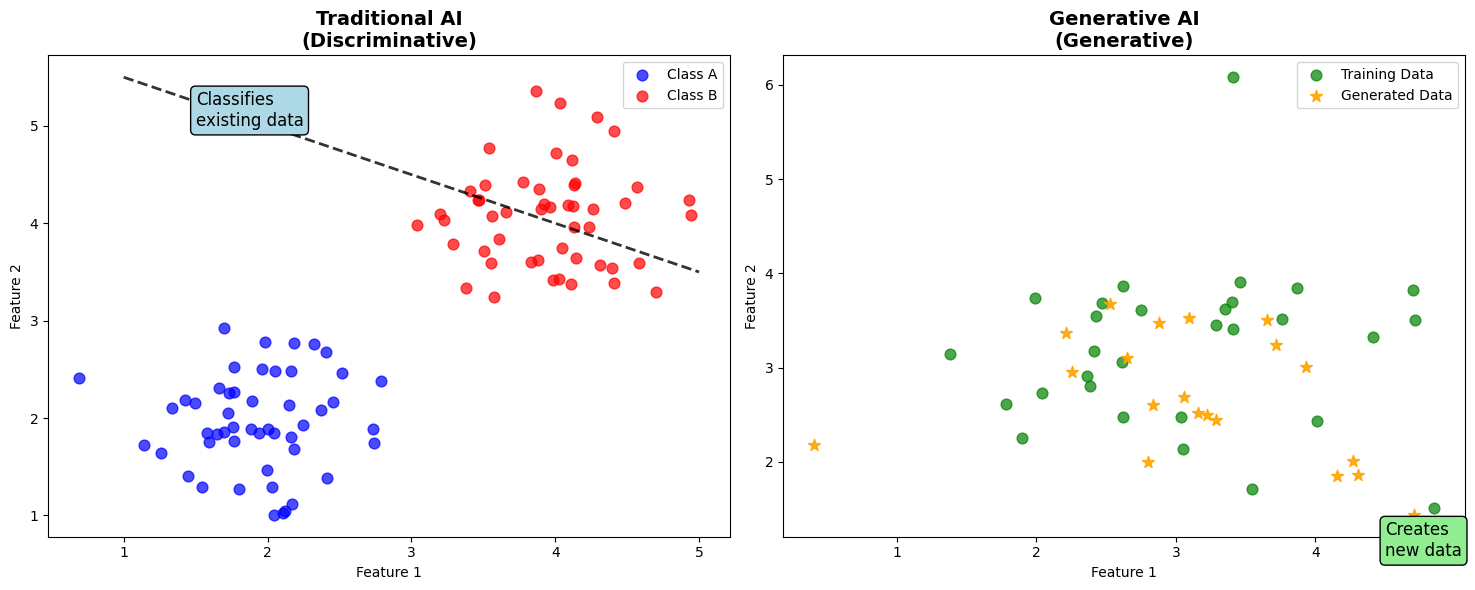

🎯 Key Difference:
Traditional AI: Input → Classification/Prediction
Generative AI:   Input → New Content Creation


In [2]:
# Visualization: Traditional AI vs Generative AI
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Traditional AI (Classification)
np.random.seed(42)
class_a = np.random.normal(2, 0.5, (50, 2))
class_b = np.random.normal(4, 0.5, (50, 2))

ax1.scatter(class_a[:, 0], class_a[:, 1], c='blue',
            alpha=0.7, label='Class A', s=60)
ax1.scatter(class_b[:, 0], class_b[:, 1], c='red',
            alpha=0.7, label='Class B', s=60)

# Decision boundary (simplified)
x_line = np.linspace(1, 5, 100)
y_line = 3 - 0.5 * x_line + 3  # Simple linear boundary
ax1.plot(x_line, y_line, 'black', linewidth=2, linestyle='--', alpha=0.8)

ax1.set_title('Traditional AI\n(Discriminative)',
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()
ax1.text(1.5, 5, 'Classifies\nexisting data', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

# Generative AI (Generation)
# Show data generation process
original_data = np.random.normal(3, 0.8, (30, 2))
generated_data = np.random.normal(3, 0.8, (20, 2))  # "Generated" data

ax2.scatter(original_data[:, 0], original_data[:, 1], c='green', alpha=0.7,
            label='Training Data', s=60, marker='o')
ax2.scatter(generated_data[:, 0], generated_data[:, 1], c='orange', alpha=0.9,
            label='Generated Data', s=80, marker='*')

ax2.set_title('Generative AI\n(Generative)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()
ax2.text(4.5, 1, 'Creates\nnew data', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

print("🎯 Key Difference:")
print("Traditional AI: Input → Classification/Prediction")
print("Generative AI:   Input → New Content Creation")

## 📚 Part 2: Essential Terminology

### 🎯 Core Concepts You Must Know

| Term            | Definition                           | Example                                  |
| --------------- | ------------------------------------ | ---------------------------------------- |
| **LLM**         | Large Language Model                 | GPT-4, Claude, Gemini                    |
| **Transformer** | Neural architecture using attention  | The backbone of modern LLMs              |
| **Attention**   | Mechanism to focus on relevant parts | Looking at specific words in a sentence  |
| **Token**       | Smallest unit of text processing     | Words or subwords                        |
| **Prompt**      | Input text to guide AI generation    | "Write a poem about..."                  |
| **Fine-tuning** | Adapting pre-trained models          | Training ChatGPT to be helpful           |
| **RAG**         | Retrieval-Augmented Generation       | Combining knowledge base with LLM        |
| **Agent**       | AI system that can take actions      | AI that can use tools and make decisions |

### 🔄 The Generation Process

1. **Input** (Prompt) → 2. **Processing** (Model) → 3. **Output** (Generated Content)

Let's see how this works with a simple example:


In [3]:
# Simple Tokenization Example (conceptual)
def simple_tokenize(text):
    """Simple tokenization for demonstration"""
    # Split by spaces and punctuation (very basic)
    import re
    tokens = re.findall(r'\w+|[^\w\s]', text.lower())
    return tokens


def visualize_tokenization(text):
    """Visualize how text gets broken into tokens"""
    tokens = simple_tokenize(text)

    print(f"📝 Original text: '{text}'")
    print(f"🔍 Tokens: {tokens}")
    print(f"📊 Number of tokens: {len(tokens)}")

    # Show token-by-token breakdown
    print("\n🎯 Token breakdown:")
    for i, token in enumerate(tokens):
        print(f"  {i+1:2d}: '{token}'")

    return tokens


# Example usage
sample_text = "Hello, world! How are you today?"
tokens = visualize_tokenization(sample_text)

print("\n" + "="*50)
print("💡 Key Insight:")
print("   - Models don't see 'words' - they see 'tokens'")
print("   - Each token gets converted to numbers (embeddings)")
print("   - This is how AI 'understands' text!")

📝 Original text: 'Hello, world! How are you today?'
🔍 Tokens: ['hello', ',', 'world', '!', 'how', 'are', 'you', 'today', '?']
📊 Number of tokens: 9

🎯 Token breakdown:
   1: 'hello'
   2: ','
   3: 'world'
   4: '!'
   5: 'how'
   6: 'are'
   7: 'you'
   8: 'today'
   9: '?'

💡 Key Insight:
   - Models don't see 'words' - they see 'tokens'
   - Each token gets converted to numbers (embeddings)
   - This is how AI 'understands' text!


## 🚀 Part 3: The Evolution - From RNNs to Transformers to LLMs

### 📈 The Journey of Language Models

```
1990s-2000s: Statistical Models (N-grams)
     ↓
2010s: Recurrent Neural Networks (RNNs/LSTMs)
     ↓
2017: Transformers ("Attention Is All You Need")
     ↓
2018-2019: BERT, GPT-1, GPT-2
     ↓
2020: GPT-3 (175B parameters)
     ↓
2022: ChatGPT & GPT-4
     ↓
2023-2024: Claude, Gemini, and the LLM explosion
     ↓
2024+: AI Agents & Agentic AI
```

### 🔄 Why Transformers Changed Everything

**Problems with RNNs:**

- ❌ Sequential processing (slow)
- ❌ Vanishing gradients (long sequences)
- ❌ Hard to parallelize

**Transformers Solution:**

- ✅ Parallel processing (fast)
- ✅ Attention mechanism (long-range dependencies)
- ✅ Scalable architecture

Let's visualize the difference:


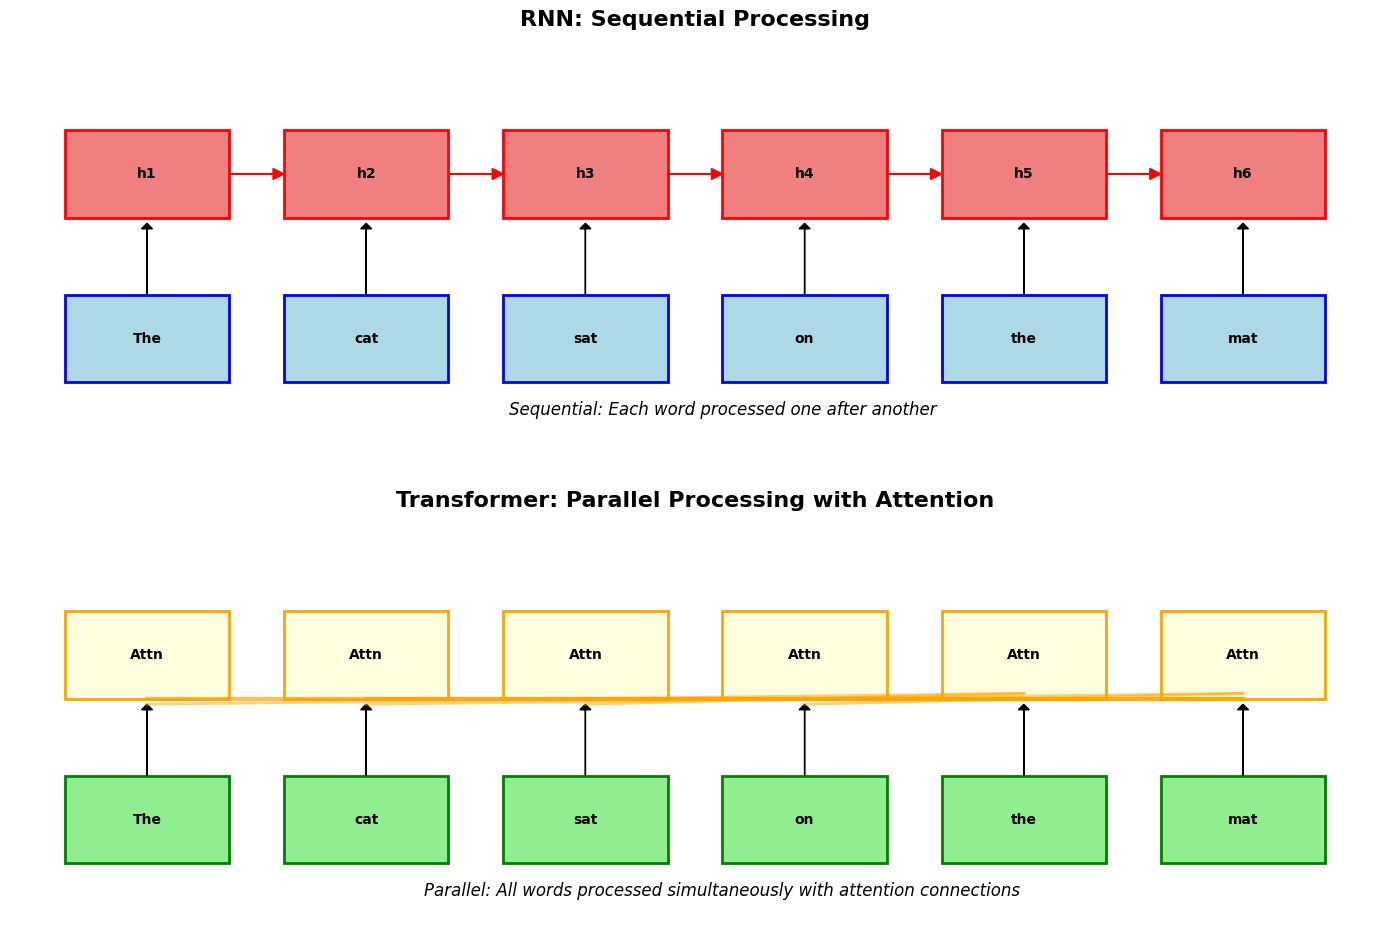

🚀 Key Advantages of Transformers:
   ✅ Parallel processing → Faster training
   ✅ Attention mechanism → Better long-range dependencies
   ✅ Scalable → Can build very large models
   ✅ Transfer learning → Pre-train once, fine-tune for many tasks


In [4]:
# Visualization: RNN vs Transformer Processing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# RNN Sequential Processing
sequence_length = 6
words = ["The", "cat", "sat", "on", "the", "mat"]

# RNN processing (sequential)
ax1.set_title("RNN: Sequential Processing",
              fontsize=16, fontweight='bold', pad=20)

for i in range(sequence_length):
    # Word boxes
    rect = plt.Rectangle((i*2, 0), 1.5, 0.8, facecolor='lightblue',
                         edgecolor='blue', linewidth=2)
    ax1.add_patch(rect)
    ax1.text(i*2 + 0.75, 0.4, words[i],
             ha='center', va='center', fontweight='bold')

    # Hidden state boxes
    rect = plt.Rectangle((i*2, 1.5), 1.5, 0.8, facecolor='lightcoral',
                         edgecolor='red', linewidth=2)
    ax1.add_patch(rect)
    ax1.text(i*2 + 0.75, 1.9, f'h{i+1}',
             ha='center', va='center', fontweight='bold')

    # Arrows
    if i < sequence_length - 1:
        ax1.arrow(i*2 + 1.5, 1.9, 0.4, 0, head_width=0.1, head_length=0.1,
                  fc='red', ec='red')

    # Vertical connections
    ax1.arrow(i*2 + 0.75, 0.8, 0, 0.6, head_width=0.1, head_length=0.05,
              fc='black', ec='black')

ax1.set_xlim(-0.5, 12)
ax1.set_ylim(-0.5, 3)
ax1.set_aspect('equal')
ax1.axis('off')
ax1.text(6, -0.3, "Sequential: Each word processed one after another",
         ha='center', fontsize=12, style='italic')

# Transformer Parallel Processing
ax2.set_title("Transformer: Parallel Processing with Attention",
              fontsize=16, fontweight='bold', pad=20)

# All words processed simultaneously
for i in range(sequence_length):
    # Word boxes
    rect = plt.Rectangle((i*2, 0), 1.5, 0.8, facecolor='lightgreen',
                         edgecolor='green', linewidth=2)
    ax2.add_patch(rect)
    ax2.text(i*2 + 0.75, 0.4, words[i],
             ha='center', va='center', fontweight='bold')

    # Attention layer
    rect = plt.Rectangle((i*2, 1.5), 1.5, 0.8, facecolor='lightyellow',
                         edgecolor='orange', linewidth=2)
    ax2.add_patch(rect)
    ax2.text(i*2 + 0.75, 1.9, 'Attn', ha='center',
             va='center', fontweight='bold')

# Attention connections (showing some connections)
# "the" connects to "the", "cat" to "mat", etc.
attention_pairs = [(0, 4), (1, 5), (2, 4), (3, 5)]
for i, j in attention_pairs:
    ax2.plot([i*2 + 0.75, j*2 + 0.75], [1.5, 1.5],
             'orange', linewidth=3, alpha=0.7)
    ax2.plot([i*2 + 0.75, j*2 + 0.75], [1.45, 1.55],
             'orange', linewidth=2, alpha=0.5)

# Vertical connections
for i in range(sequence_length):
    ax2.arrow(i*2 + 0.75, 0.8, 0, 0.6, head_width=0.1, head_length=0.05,
              fc='black', ec='black')

ax2.set_xlim(-0.5, 12)
ax2.set_ylim(-0.5, 3)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.text(6, -0.3, "Parallel: All words processed simultaneously with attention connections",
         ha='center', fontsize=12, style='italic')

plt.tight_layout()
plt.show()

print("🚀 Key Advantages of Transformers:")
print("   ✅ Parallel processing → Faster training")
print("   ✅ Attention mechanism → Better long-range dependencies")
print("   ✅ Scalable → Can build very large models")
print("   ✅ Transfer learning → Pre-train once, fine-tune for many tasks")

## 🔍 Part 4: Understanding Attention (Simplified)

### 🧠 What is Attention?

**Human Analogy:** When you read this sentence, you don't give equal attention to every word - you focus on the important ones.

**In AI:** Attention allows the model to focus on relevant parts of the input when generating each output token.

### 📝 Example: Translation Task

**Input:** "The cat sat on the mat"  
**Output:** "Le chat s'est assis sur le tapis"

When generating "chat" (cat), the model should pay attention to "cat" in the input, not "the" or "mat".

### 🎯 Attention Formula (Simplified)

```
Attention(Q, K, V) = softmax(Q·K^T / √d) · V
```

Where:

- **Q** = Query (what we're looking for)
- **K** = Key (what we're looking in)
- **V** = Value (what we want to retrieve)

Don't worry about the math yet - we'll implement this in Week 2! For now, let's visualize the concept:


🌍 Translation Example:
Input: The cat sat on the mat
Generating: 'chat' (French for 'cat')
Notice how attention focuses on 'cat'!



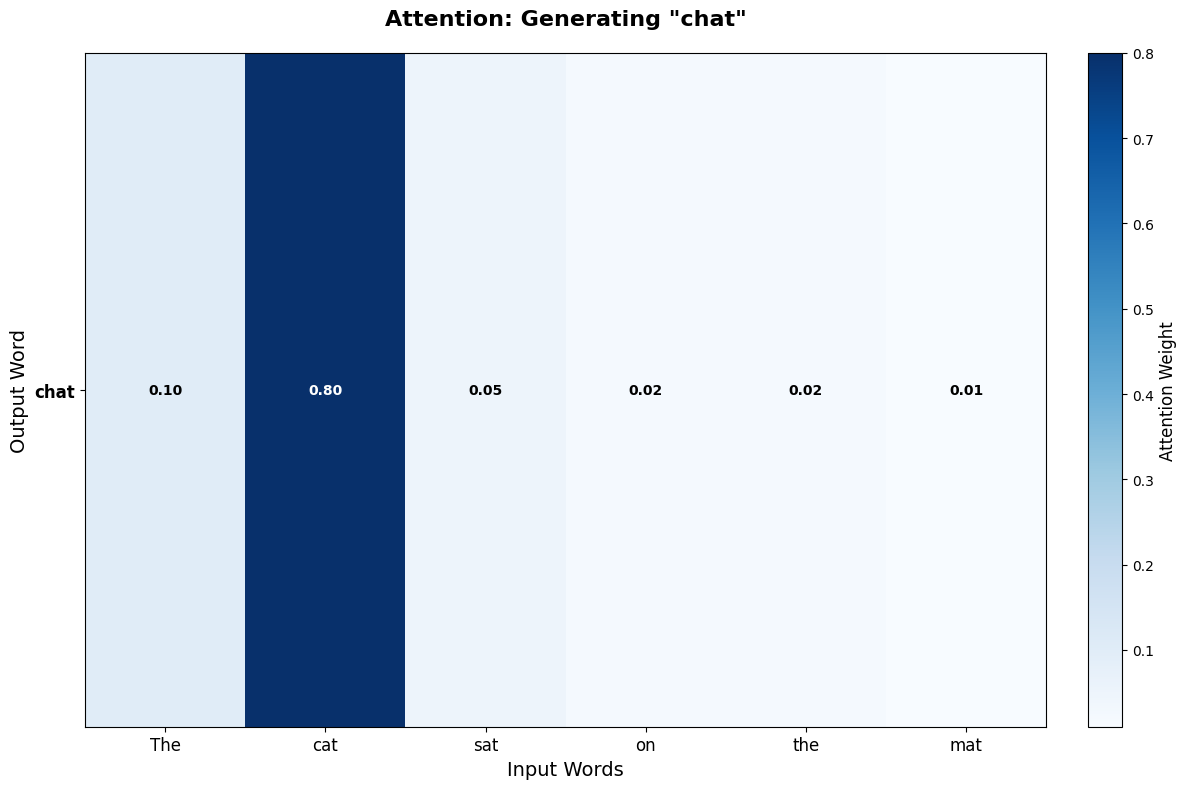


🎯 Another Example:
Generating: 'tapis' (French for 'mat')
Notice how attention shifts to 'mat'!



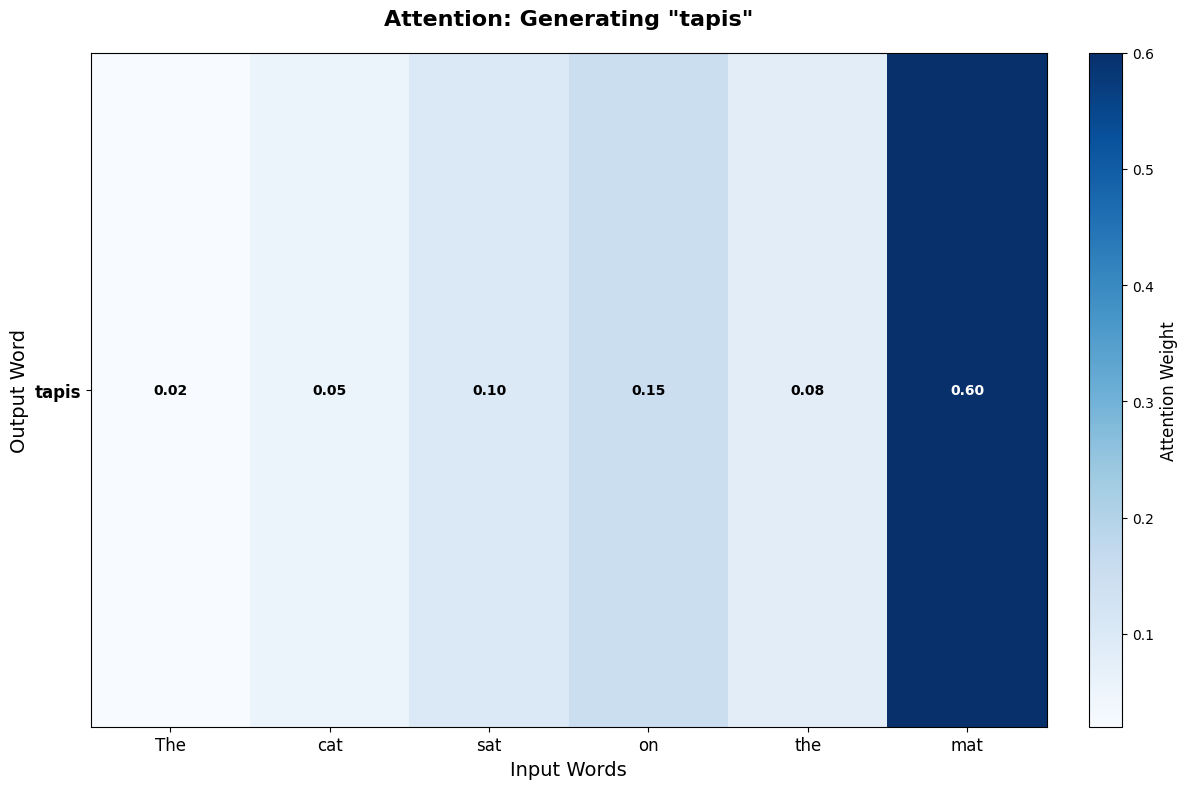

In [5]:
# Attention Visualization
def visualize_attention(input_words, output_word, attention_weights):
    """Visualize attention weights between input and output"""

    fig, ax = plt.subplots(figsize=(12, 8))

    # Create attention heatmap
    attention_matrix = np.array(attention_weights).reshape(1, -1)

    im = ax.imshow(attention_matrix, cmap='Blues', aspect='auto')

    # Set labels
    ax.set_xticks(range(len(input_words)))
    ax.set_xticklabels(input_words, fontsize=12)
    ax.set_yticks([0])
    ax.set_yticklabels([output_word], fontsize=12, fontweight='bold')

    # Add attention weight text
    for i, weight in enumerate(attention_weights):
        ax.text(i, 0, f'{weight:.2f}', ha='center', va='center',
                fontweight='bold', fontsize=10,
                color='white' if weight > 0.5 else 'black')

    ax.set_title(
        f'Attention: Generating "{output_word}"', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Input Words', fontsize=14)
    ax.set_ylabel('Output Word', fontsize=14)

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Attention Weight', fontsize=12)

    plt.tight_layout()
    plt.show()


# Example 1: Translating "cat"
input_sentence = ["The", "cat", "sat", "on", "the", "mat"]
output_word = "chat"  # French for "cat"
# High attention on "cat", low on others
attention_weights = [0.1, 0.8, 0.05, 0.02, 0.02, 0.01]

print("🌍 Translation Example:")
print(f"Input: {' '.join(input_sentence)}")
print(f"Generating: '{output_word}' (French for 'cat')")
print("Notice how attention focuses on 'cat'!")
print()

visualize_attention(input_sentence, output_word, attention_weights)

# Example 2: More complex attention pattern
print("\n" + "="*50)
print("🎯 Another Example:")
output_word2 = "tapis"  # French for "mat"
attention_weights2 = [0.02, 0.05, 0.1, 0.15, 0.08, 0.6]  # Focus on "mat"

print(f"Generating: '{output_word2}' (French for 'mat')")
print("Notice how attention shifts to 'mat'!")
print()

visualize_attention(input_sentence, output_word2, attention_weights2)

## 🌟 Part 5: Real-World Applications & The AI Landscape

### 🎯 Current Applications of Generative AI

| Domain         | Application                   | Examples                             |
| -------------- | ----------------------------- | ------------------------------------ |
| **Text**       | Content writing, coding, chat | ChatGPT, GitHub Copilot, Claude      |
| **Images**     | Art generation, editing       | DALL-E, Midjourney, Stable Diffusion |
| **Code**       | Programming assistance        | GitHub Copilot, CodeT5, Replit       |
| **Audio**      | Music, speech synthesis       | Eleven Labs, Mubert                  |
| **Video**      | Video generation              | RunwayML, Pika Labs                  |
| **Multimodal** | Vision + Language             | GPT-4V, Claude 3                     |

### 🚀 The Path to AI Agents

```
Basic GenAI → Advanced GenAI → AI Agents → Agentic AI
    ↓              ↓              ↓           ↓
Text Gen    →  Multi-modal  →  Tool Use  →  Autonomous
Chatbots    →  Understanding → Planning   →  Systems
Simple      →  Complex       → Memory     →  Goal-oriented
```

### 🎭 From Simple to Sophisticated

Let's visualize the progression from simple text generation to AI agents:


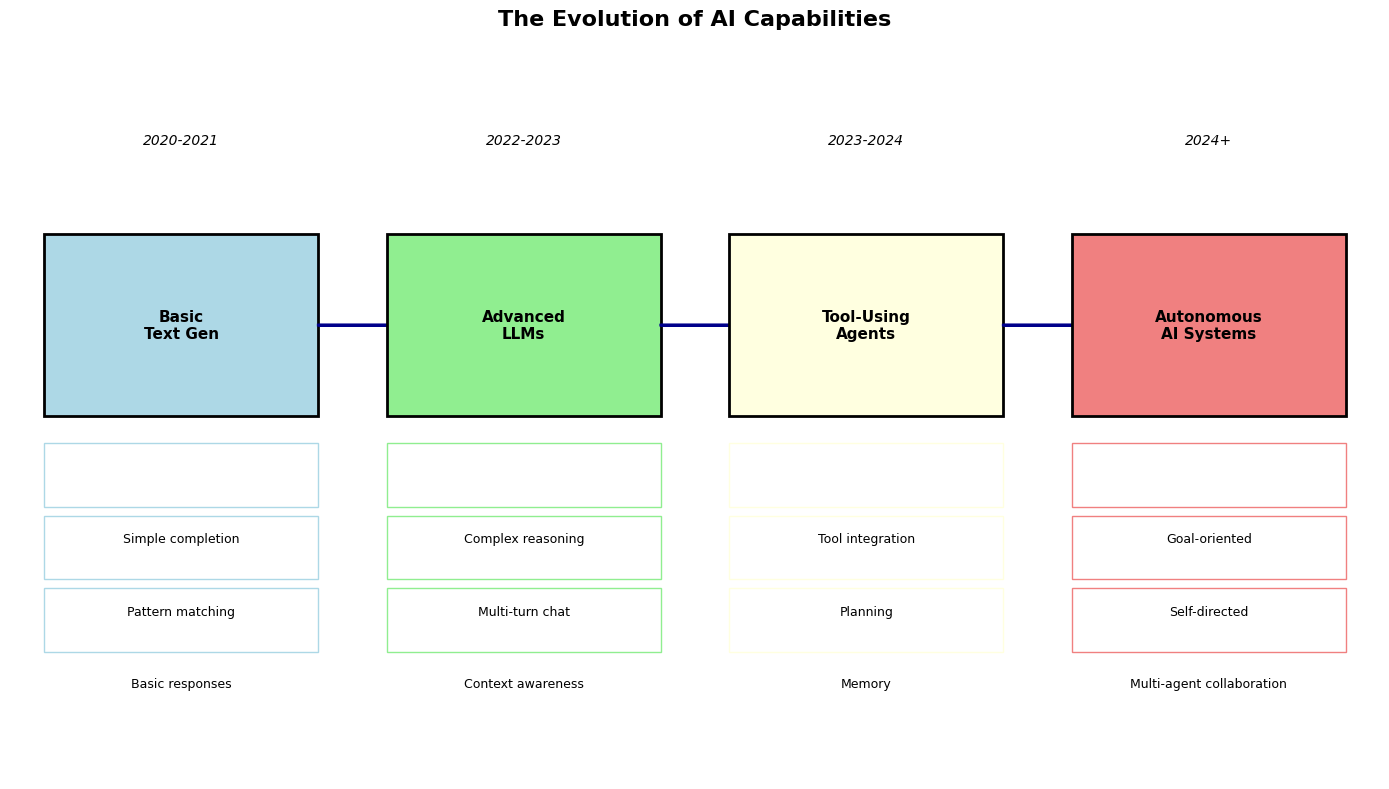

🎯 We Are Here: Transitioning from Advanced LLMs to AI Agents

📚 Your Learning Journey:
   Week 1-2: Understanding the foundations (Transformers)
   Week 3-4: Building and using LLMs
   Week 5+:  Creating AI Agents that can act autonomously


In [6]:
# AI Capability Progression Visualization
fig, ax = plt.subplots(figsize=(14, 8))

# Define the progression stages
stages = ["Basic\nText Gen", "Advanced\nLLMs",
          "Tool-Using\nAgents", "Autonomous\nAI Systems"]
capabilities = [
    ["Simple completion", "Pattern matching", "Basic responses"],
    ["Complex reasoning", "Multi-turn chat", "Context awareness"],
    ["Tool integration", "Planning", "Memory"],
    ["Goal-oriented", "Self-directed", "Multi-agent collaboration"]
]

colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
positions = [1, 3, 5, 7]

# Create progression chart
for i, (stage, caps, color, pos) in enumerate(zip(stages, capabilities, colors, positions)):
    # Main stage box
    rect = plt.Rectangle((pos-0.8, 4), 1.6, 2, facecolor=color,
                         edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(pos, 5, stage, ha='center', va='center',
            fontweight='bold', fontsize=11)

    # Capability boxes
    for j, cap in enumerate(caps):
        rect = plt.Rectangle((pos-0.8, 3-j*0.8), 1.6, 0.7, facecolor='white',
                             edgecolor=color, linewidth=1)
        ax.add_patch(rect)
        ax.text(pos, 2.65-j*0.8, cap, ha='center', va='center', fontsize=9)

    # Arrows between stages
    if i < len(stages) - 1:
        ax.arrow(pos + 0.8, 5, 1.4, 0, head_width=0.2, head_length=0.2,
                 fc='darkblue', ec='darkblue', linewidth=2)

# Add timeline
ax.text(1, 7, "2020-2021", ha='center', fontsize=10, style='italic')
ax.text(3, 7, "2022-2023", ha='center', fontsize=10, style='italic')
ax.text(5, 7, "2023-2024", ha='center', fontsize=10, style='italic')
ax.text(7, 7, "2024+", ha='center', fontsize=10, style='italic')

ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_title("The Evolution of AI Capabilities",
             fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

print("🎯 We Are Here: Transitioning from Advanced LLMs to AI Agents")
print("\n📚 Your Learning Journey:")
print("   Week 1-2: Understanding the foundations (Transformers)")
print("   Week 3-4: Building and using LLMs")
print("   Week 5+:  Creating AI Agents that can act autonomously")

## 🗺️ Part 6: Your Learning Path Ahead

### 📅 9-Week Comprehensive Learning Journey (5 Days Per Week)

#### **Week 1: Mathematical Foundations & Attention Basics** 🧮

- **Day 1:** Linear algebra foundations (vectors, matrices, dot products)
- **Day 2:** Introduction to attention mechanisms & intuitive understanding
- **Day 3:** Scaled dot-product attention - theory and visualization
- **Day 4:** Single-head attention implementation from scratch
- **Day 5:** Practice session: Building attention visualizations

#### **Week 2: Multi-Head Attention & Positional Encoding** 🔄

- **Day 1:** Multi-head attention concept and implementation
- **Day 2:** Positional encoding - why and how it works
- **Day 3:** Sinusoidal vs learned positional embeddings
- **Day 4:** Combining attention with positional information
- **Day 5:** Complete attention block with layer normalization

#### **Week 3: Transformer Encoder Architecture** 🏗️

- **Day 1:** Feed-forward networks and residual connections
- **Day 2:** Layer normalization and its importance
- **Day 3:** Complete transformer encoder block implementation
- **Day 4:** Stacking multiple encoder layers
- **Day 5:** BERT-style encoder architecture deep dive

#### **Week 4: Transformer Decoder Architecture** 🎯

- **Day 1:** Masked self-attention for autoregressive generation
- **Day 2:** Cross-attention between encoder and decoder
- **Day 3:** Complete transformer decoder implementation
- **Day 4:** GPT-style decoder-only architecture
- **Day 5:** Comparing encoder vs decoder vs encoder-decoder models

#### **Week 5: Complete Transformer Implementation** ⚙️

- **Day 1:** Mini-transformer from scratch - architecture design
- **Day 2:** Training loop and loss functions
- **Day 3:** Tokenization and data preprocessing
- **Day 4:** Testing and debugging your transformer
- **Day 5:** Performance optimization and analysis

#### **Week 6: Pre-training and Modern LLM Architectures** 🚀

- **Day 1:** Pre-training strategies and objectives
- **Day 2:** Data preparation and cleaning pipelines
- **Day 3:** Modern architectures: GPT-4, Claude, Gemini differences
- **Day 4:** Scaling laws and parameter efficiency
- **Day 5:** Understanding emergent capabilities

#### **Week 7: Fine-tuning and Adaptation Techniques** 🎨

- **Day 1:** Full fine-tuning vs parameter-efficient methods
- **Day 2:** LoRA (Low-Rank Adaptation) implementation
- **Day 3:** QLoRA and other efficient fine-tuning methods
- **Day 4:** Instruction tuning and dataset preparation
- **Day 5:** Hands-on project: Fine-tune your own model

#### **Week 8: Advanced Training and RLHF** 🧠

- **Day 1:** Reinforcement Learning from Human Feedback (RLHF)
- **Day 2:** Constitutional AI and safety considerations
- **Day 3:** Advanced prompting and chain-of-thought reasoning
- **Day 4:** Model evaluation and benchmarking
- **Day 5:** Bias detection and mitigation strategies

#### **Week 9: Production and Applications** 🌟

- **Day 1:** RAG (Retrieval-Augmented Generation) systems
- **Day 2:** Vector databases and semantic search
- **Day 3:** LLM APIs, integration patterns, and optimization
- **Day 4:** Production deployment, monitoring, and scaling
- **Day 5:** Complete capstone project: End-to-end LLM application

### 🚀 **Beyond Week 9: AI Agents & Advanced Topics**

#### **Week 10+: AI Agents and Agentic AI**

- Multi-agent systems and autonomous AI
- Tool use, function calling, and external API integration
- Planning, reasoning, and decision-making algorithms
- Building production-ready AI agents

### 🎯 Success Milestones

By the end of each phase, you should be able to:

**Weeks 1-2:** ✅ Implement attention mechanisms from mathematical foundations  
**Weeks 3-4:** ✅ Build complete transformer encoder and decoder architectures  
**Week 5:** ✅ Code a full mini-transformer and understand training dynamics  
**Weeks 6-7:** ✅ Understand modern LLM architectures and fine-tuning techniques  
**Weeks 8-9:** ✅ Apply advanced training methods and deploy production systems

### 📚 Weekly Time Commitment

- **Daily:** 2-3 hours of focused learning & coding
- **Weekly:** 10-15 hours total commitment
- **Flexibility:** Weekend time for review, projects, and catch-up
- **Total Journey:** ~135 hours of comprehensive hands-on learning

### 🎓 Learning Approach

- **70% Hands-on Coding:** Build everything from scratch
- **20% Theory & Concepts:** Deep understanding of fundamentals
- **10% Projects & Practice:** Real-world applications and portfolio building


In [7]:
# Interactive Knowledge Check
def knowledge_check():
    """Simple interactive quiz to check understanding"""

    questions = [
        {
            "question": "What is the main difference between traditional AI and generative AI?",
            "options": ["A) Speed", "B) Classification vs Creation", "C) Model size", "D) Programming language"],
            "correct": "B",
            "explanation": "Traditional AI classifies/analyzes existing data, while Generative AI creates new data."
        },
        {
            "question": "What breakthrough paper introduced the Transformer architecture?",
            "options": ["A) BERT", "B) GPT", "C) Attention Is All You Need", "D) ResNet"],
            "correct": "C",
            "explanation": "The 2017 paper 'Attention Is All You Need' by Vaswani et al. introduced Transformers."
        },
        {
            "question": "What allows Transformers to process sequences in parallel?",
            "options": ["A) RNNs", "B) Attention mechanism", "C) Convolutions", "D) Memory"],
            "correct": "B",
            "explanation": "The attention mechanism allows all positions to be processed simultaneously."
        }
    ]

    score = 0
    for i, q in enumerate(questions, 1):
        print(f"\n📝 Question {i}: {q['question']}")
        for option in q['options']:
            print(f"   {option}")

        # In a real interactive environment, you'd get user input
        # For now, just show the answer
        print(f"\n✅ Correct Answer: {q['correct']}")
        print(f"💡 Explanation: {q['explanation']}")
        print("-" * 50)

    print(f"\n🎉 Great job working through the concepts!")
    print("You're ready to move to Chapter 02: Setting Up Your Development Environment")


# Run the knowledge check
knowledge_check()

# What's next?
print("\n" + "="*60)
print("🚀 NEXT STEPS:")
print("="*60)
print()
print("1. 📁 Navigate to src/chapter-02/ for environment setup")
print("2. 🔧 Install transformer libraries (torch, transformers)")
print("3. 🧠 Start implementing attention mechanisms")
print("4. 📚 Review the docs/ folder for deep theoretical background")
print()
print("💪 Remember: This is a marathon, not a sprint!")
print("   Take your time, experiment, and most importantly - have fun!")
print()
print("🎯 Ready to become a Generative AI expert? Let's go!")


📝 Question 1: What is the main difference between traditional AI and generative AI?
   A) Speed
   B) Classification vs Creation
   C) Model size
   D) Programming language

✅ Correct Answer: B
💡 Explanation: Traditional AI classifies/analyzes existing data, while Generative AI creates new data.
--------------------------------------------------

📝 Question 2: What breakthrough paper introduced the Transformer architecture?
   A) BERT
   B) GPT
   C) Attention Is All You Need
   D) ResNet

✅ Correct Answer: C
💡 Explanation: The 2017 paper 'Attention Is All You Need' by Vaswani et al. introduced Transformers.
--------------------------------------------------

📝 Question 3: What allows Transformers to process sequences in parallel?
   A) RNNs
   B) Attention mechanism
   C) Convolutions
   D) Memory

✅ Correct Answer: B
💡 Explanation: The attention mechanism allows all positions to be processed simultaneously.
--------------------------------------------------

🎉 Great job working thro